In [5]:
import pandas as pd
from pprint import pprint

ruta = "../data/Espeletia_NASADEM_filt.csv"
bd = pd.read_csv(ruta, sep=",") 

In [6]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22309 entries, 0 to 22308
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    22309 non-null  object 
 1   elevation_DEM  22309 non-null  int64  
 2   eventDate      22162 non-null  object 
 3   genus          22309 non-null  object 
 4   lat            22309 non-null  float64
 5   locality       20453 non-null  object 
 6   lon            22309 non-null  float64
 7   species        21146 non-null  object 
 8   stateProvince  21312 non-null  object 
 9   .geo           22309 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.7+ MB


In [7]:
bd.describe()

,elevation_DEM,lat,lon
count,22309.000000,22309.000000,22309.000000
mean,3499.842978,5.102999,-73.996030
std,356.718053,1.978229,1.817466
min,2800.000000,-1.500001,-78.916667
25%,3275.000000,4.494444,-75.323518
50%,3437.000000,5.219601,-73.837947
75%,3644.000000,6.343085,-72.695583
max,5287.000000,10.941898,-70.073899


In [8]:
bd.isna().sum()

countryCode         0
elevation_DEM       0
eventDate         147
genus               0
lat                 0
locality         1856
lon                 0
species          1163
stateProvince     997
.geo                0
dtype: int64

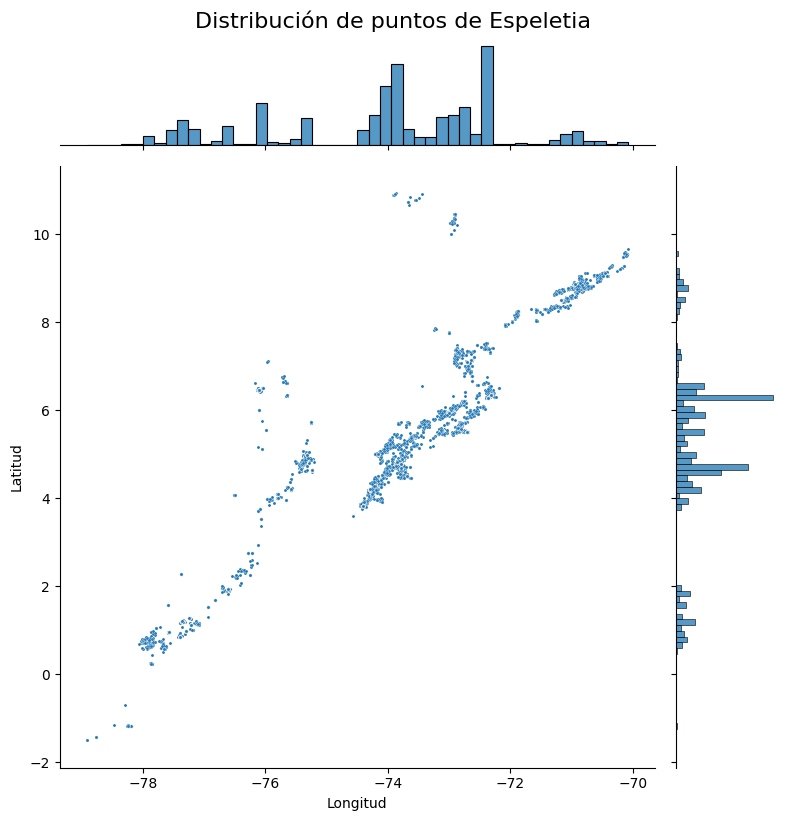

In [14]:
# Generate scatter plot
import seaborn as sbn
import matplotlib.pyplot as plt

plot = sbn.jointplot(
    x='lon', 
    y='lat', 
    data=bd, 
    s=5,  # Tamaño de los puntos
    height=8
)

# Agregar título y etiquetas
plot.fig.suptitle("Distribución de puntos de Espeletia", y=1.02, fontsize=16)
plot.set_axis_labels("Longitud", "Latitud")

plt.show()

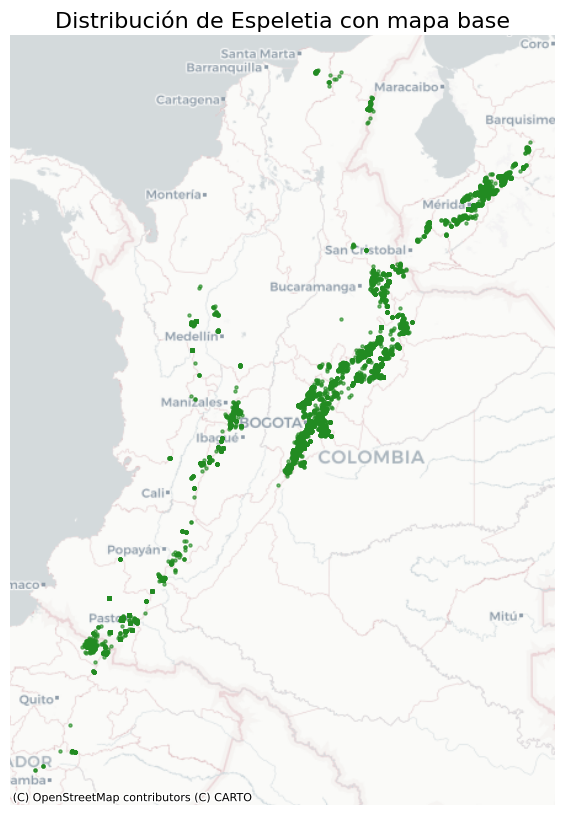

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Convertir tu DataFrame a GeoDataFrame
gdf = gpd.GeoDataFrame(
    bd, 
    geometry=gpd.points_from_xy(bd['lon'], bd['lat']),
    crs="EPSG:4326"  # WGS84
)

# Reproyectar a Web Mercator (obligatorio para contextily)
gdf = gdf.to_crs(epsg=3857)

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar puntos
gdf.plot(ax=ax, markersize=5, color='forestgreen', alpha=0.6)

# Añadir mapa base
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Estilo
ax.set_title("Distribución de Espeletia con mapa base", fontsize=16)
ax.set_axis_off()  # si prefieres sin ejes

plt.show()

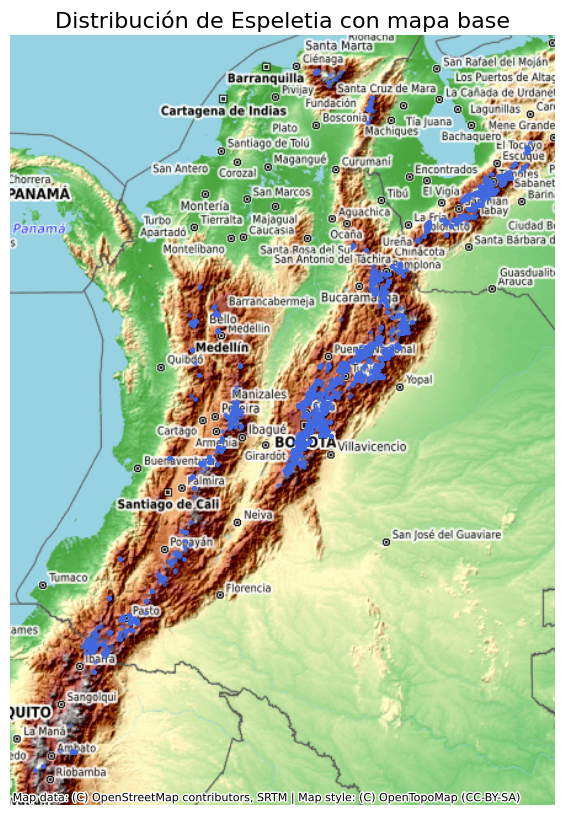

In [30]:
# Crear la figura
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar puntos
gdf.plot(ax=ax, markersize=5, color='royalblue', alpha=0.6)

# Añadir mapa base
ctx.add_basemap(ax, source=ctx.providers.OpenTopoMap)

# Estilo
ax.set_title("Distribución de Espeletia con mapa base", fontsize=16)
ax.set_axis_off()  # si prefieres sin ejes

plt.show()

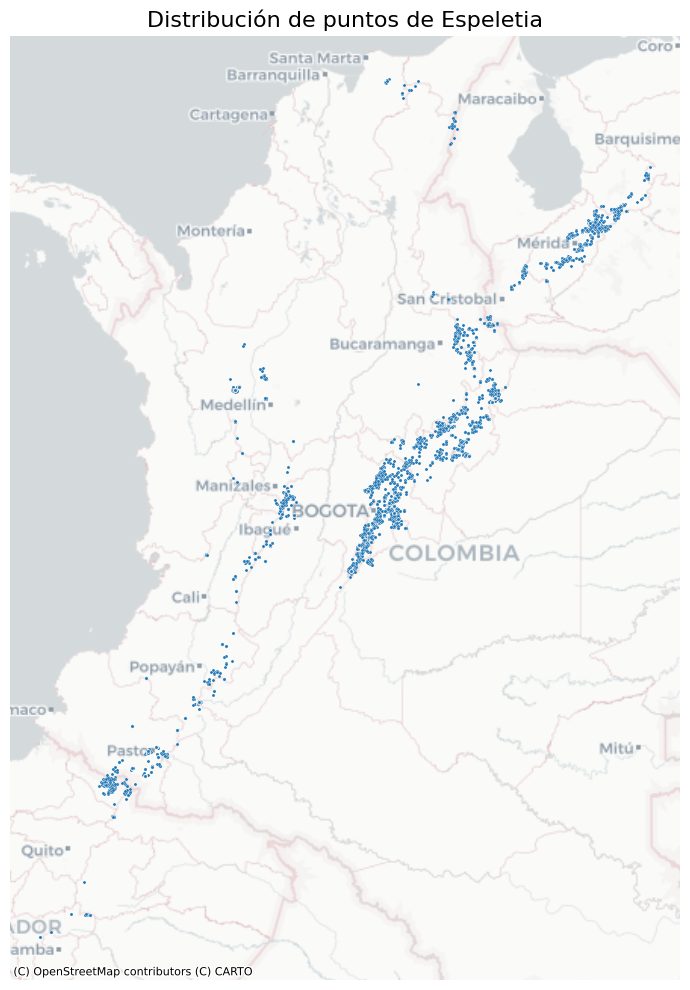

In [43]:
import matplotlib.pyplot as plt
import seaborn as sbn
import contextily as ctx
import geopandas as gpd

# Convertir a GeoDataFrame para reproyectar
gdf = gpd.GeoDataFrame(
    bd,
    geometry=gpd.points_from_xy(bd['lon'], bd['lat']),
    crs='EPSG:4326'
)
gdf = gdf.to_crs(epsg=3857)  # reproyectar a Web Mercator para contextily

# Extraer coordenadas reproyectadas
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y

# Crear figura y eje
fig, ax = plt.subplots(figsize=(7, 10))

# Graficar puntos con seaborn
sbn.scatterplot(x='x', y='y', data=gdf, s=5, ax=ax)

# Agregar mapa base
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Estética
ax.set_title("Distribución de puntos de Espeletia", fontsize=16)
ax.set_axis_off()

plt.tight_layout()
plt.show()


In [11]:
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
# Paso 2: Extraer las columnas proyectadas (x, y)
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y

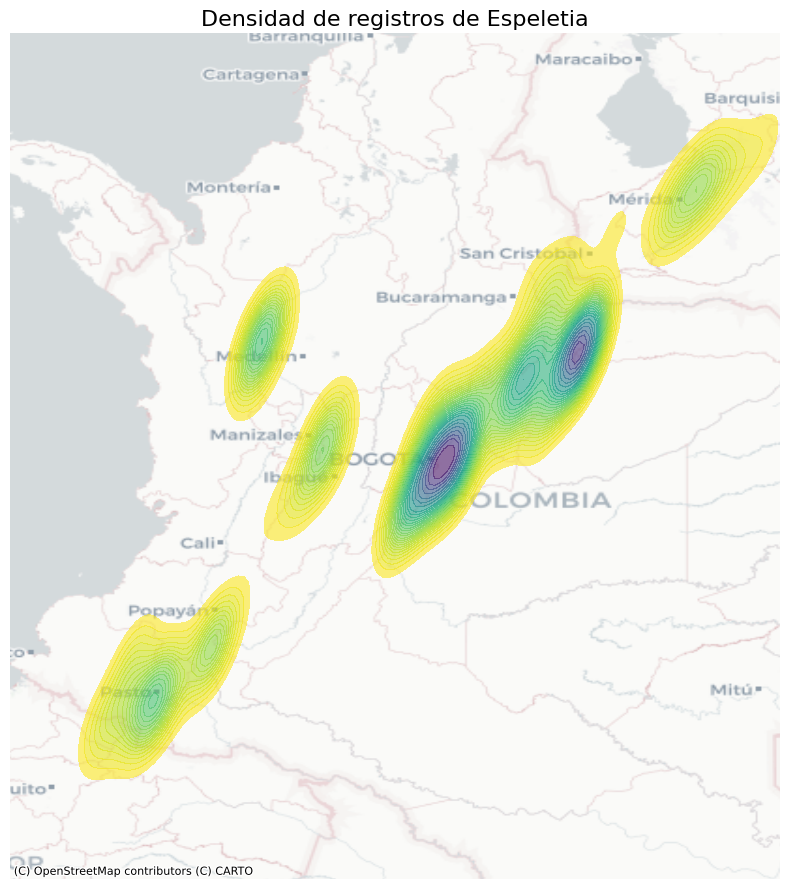

In [35]:
# Crear el mapa de densidad
f, ax = plt.subplots(figsize=(8, 9))

# Mapa de calor KDE con Seaborn
sbn.kdeplot(
    x=gdf['x'],
    y=gdf['y'],
    n_levels=30,
    fill=True,
    cmap='viridis_r',
    alpha=0.6,
    ax=ax
)

# Agregar mapa base
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Opcional: ajustar límites (bounding box), puedes personalizar según tus datos
ax.set_xlim(gdf['x'].min() - 10000, gdf['x'].max() + 10000)
ax.set_ylim(gdf['y'].min() - 10000, gdf['y'].max() + 10000)

# Título
ax.set_title("Densidad de registros de Espeletia", fontsize=16)

# Quitar ejes para que se vea más limpio
ax.set_axis_off()

plt.tight_layout()
plt.show()

## Cartografía

In [44]:
from pointpats import centrography
mean_center = centrography.mean_center(gdf[['x', 'y']])
med_center = centrography.euclidean_median(gdf[['x', 'y']])

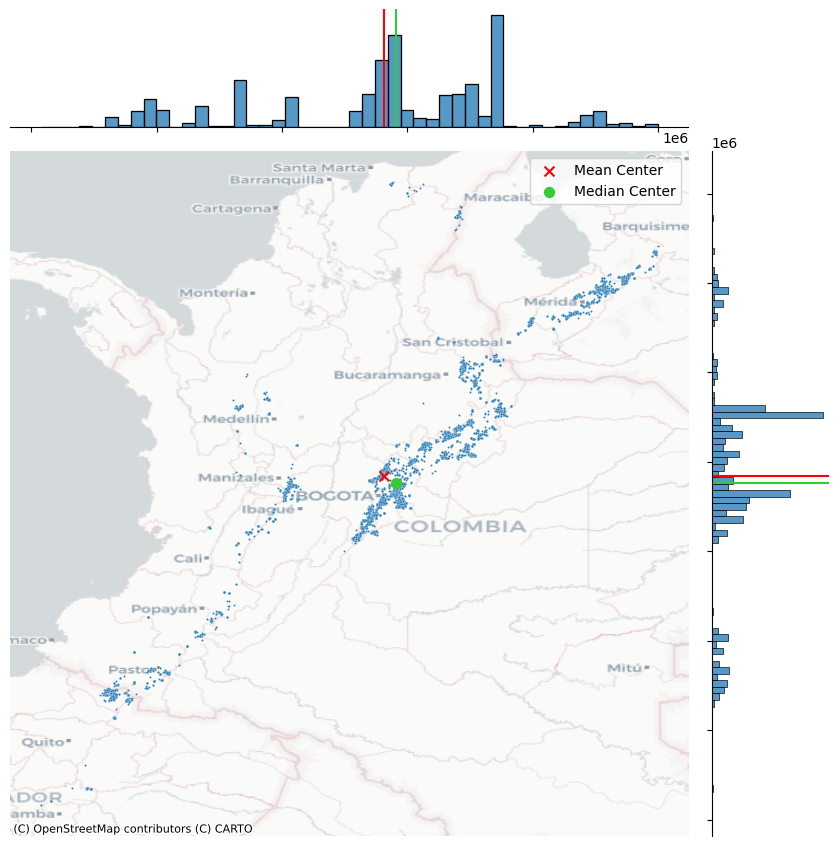

In [46]:
# Generate scatter plot
joint_axes = sbn.jointplot(x='x', y='y',data=gdf,s=2.0,height=9)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(*mean_center, color='red', marker='x', s=50, label='Mean Center')
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')
# Add median point and marginal lines
joint_axes.ax_joint.scatter(*med_center, color='limegreen', marker='o', s=50, label='Median Center')
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')
# Legend
joint_axes.ax_joint.legend()
# Add basemap
ctx.add_basemap(joint_axes.ax_joint,source=ctx.providers.CartoDB.Positron)
# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()

## Dispersión

In [49]:
centrography.std_distance(gdf[['x','y']])

np.float64(299674.68668661726)

In [50]:
major, minor, rotation = centrography.ellipse(gdf[['x','y']])

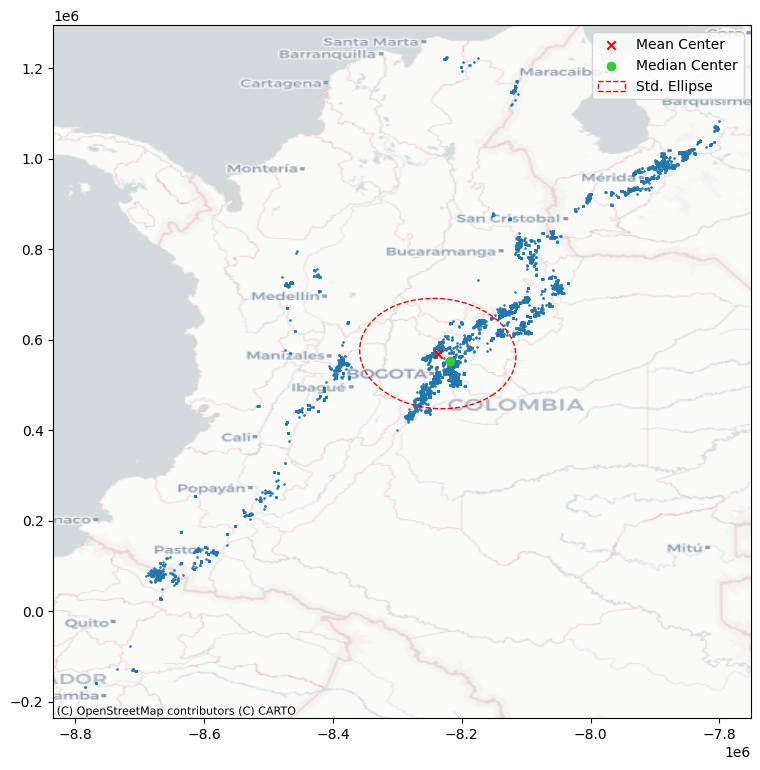

In [51]:
from matplotlib.patches import Ellipse
import numpy as np

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot photograph points
ax.scatter(gdf['x'], gdf['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = np.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle='--',
                  label='Std. Ellipse')
ax.add_patch(ellipse)

ax.legend()
# Display
# Add basemap
ctx.add_basemap(
    ax, 
    source=ctx.providers.CartoDB.Positron
)
plt.show()

## Analisis de distribución tomando las especies como clases